
###### Univerza v Ljubljani
###### Fakulteta za matematiko in fiziko
###### Finančna matematika - 1. stopnja

<br>

### Karmen Zupančič in Rok Stanič

# Convexity in complex networks

<br>

##### Finančni praktikum

##### Mentorja: Riste Škrekovski, Janoš Vidali

#### Navodila za delo

Naj bo G enostaven, povezan graf  in naj bo $S$ podgraf na neki podmnožici vozlišč $G$-ja. Podgraf $S$ je konveksen podgraf $G$-ja, če vsebuje vse najkrajše poti med vozlišči.  Konveksna ovojnica podmnožice vozlišč $S$ je konveksen graf, ki vsebuje minimalno število povezav, ki vsebuje vsa vozlišča iz $S$.  Hullovo število grafa, je najmnajše število vozlišč , katerih  konveksna ovojnica je ravno celoten graf. Hullovo število lahko interpretiramo, kot mero konveksnosti, ki raziskuje globalno strukturo omrežja.

Potrebno je izvesti naslednje tri korake:
* Uporabi Algoritem 1 pri razširitvi konveksnega podgrafa.
* Z uporabo empiričnih mrež iz različnih domen in Algoritma 1, razišči konveksnost v kompleksnih mrežah s tem da analiziraš majhen del vozlišč v rastočem konveksnem podgrafu na različnih korakih v algoritmu. Poskusi demonstrirati da so mreže, ki so karakterizirane z drevesno strukturo ali gručasta struktura globalno konveksne, kar pomeni, da bo katerikoli povezana podmnožica vozlišč po vsej verjetnosti inducirala konveksen podgraf.
* S pomočjo generiranja grafov in Algoritma 1¸ pokaži, da so naključni grafi samo lokalno konveksni, kar pomeni, da velikost konveksnih podgrafov v prvih korakih počasi narašča potem pa se velikosti podgrafa hitro bliža velikosti celotnega grafa. 


### Algoritem

In [3]:
import json

In [2]:
import random
def sosedi_ki_se_niso_v_S(sez1,sez2):
    return [u for u in sez1 if u not in sez2]

In [4]:
def convextion_of_convex_subsets(graf):
    S = set()
    S.add(graf.random_vertex())
    Seznam_grafov=[]
    Graf_convexity_lastnosti =graf.convexity_properties()
    while len(S) < graf.order():
        kandidati=[]
        for i in S:
            kandidati += graf[i]
        kandidati = sosedi_ki_se_niso_v_S(kandidati,S)
        print S, kandidati
        S = set(Graf_convexity_lastnosti.hull(list(S)+[random.choice(kandidati)]))
        Seznam_grafov.append(graf.subgraph(S))
        F = graf.subgraph(S)
        F.plot().show()
    return Seznam_grafov

In [5]:
def convextion_of_convex_subsets_brez_izpisovanja(graf):
    S = set()
    S.add(graf.random_vertex())
    Seznam_grafov=[]
    Graf_convexity_lastnosti =graf.convexity_properties()
    while len(S) < graf.order():
        kandidati=[]
        for i in S:
            kandidati += graf[i]
        kandidati = sosedi_ki_se_niso_v_S(kandidati,S)
        S = set(Graf_convexity_lastnosti.hull(list(S)+[random.choice(kandidati)]))
        Seznam_grafov.append(graf.subgraph(S))
    return Seznam_grafov

**Delovanje algoritma:**
1. Ustvarimo prazno mnozico in ji dodamo nakljucno tocko podanega grafa
2. lastnosti podanega grafa shranimo
3. zapeljemo se po zanki dokler mnozica ne vsebuje vseh tock
4. vse sosede točk v množici S shranimo (večkrat, če se večkrat pojavijo) in naredimo presek s točkami ki so že v množici
5. iz preseka izberemo naključno točko in jo dodamo naši množici
6. množico točk  razširimo na najmnanjšo nadmnožico točk, na kateri je podan graf konveksen (morda ne bo treba dodati nobene točke)
7. ustvarimo podgraf na razširjeni podmnožici in ga shranimo
8. vrnemo vse shranjene podgrafe

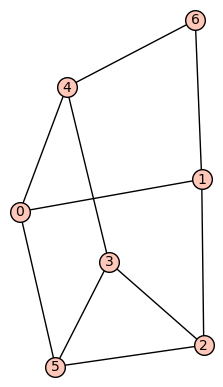

In [17]:
d = {0: [1,4,5], 1: [2,6], 2: [3,5], 3: [4,5], 4: [6]}
G = Graph(d)
G.plot()


set([3]) [2, 4, 5]


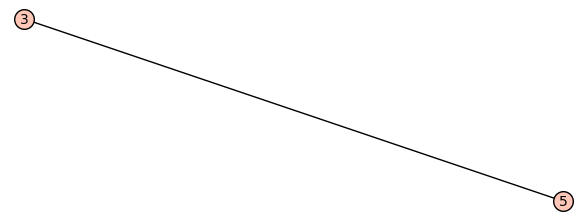

set([3, 5]) [2, 4, 0, 2]


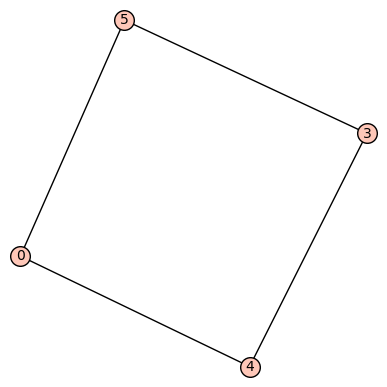

set([0, 3, 4, 5]) [1, 2, 6, 2]


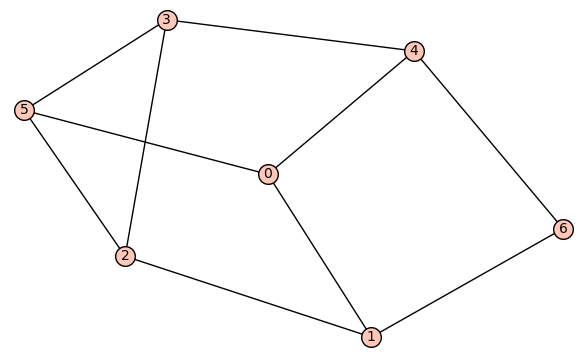

[Subgraph of (): Graph on 2 vertices,
 Subgraph of (): Graph on 4 vertices,
 Subgraph of (): Graph on 7 vertices]

In [18]:
convextion_of_convex_subsets(G)

In [6]:
def analiza(podgrafi):
    stevilo_korakov=len(podgrafi)
    maxskok=1
    for j in range(0,len(podgrafi)-1):
        if podgrafi[j+1].order()-podgrafi[j].order() > maxskok:
            maxskok=podgrafi[j+1].order()-podgrafi[j].order()
    return [stevilo_korakov, maxskok,round(podgrafi[-1].clustering_average()*1,3)]

### Uporaba algoritma na empiričnih mrežah


Konveksnost lahko preučujemo tudi na grafih oblikovanih s praktičnimi podatki. Na primer na socialnih omrežjih, kjer bi vsako vozlišče grafa ponazarjalo uporabniški račun, povezava med dvema pa dejstvo, da se dva uporabnika med seboj poznata. Omejimo pa se samo na grafe, ki so neusmerjeni (nimajo usmerjenih povezav), povezani (do vsakega vozlišča lahko pridemo iz kateregakoli drugega vozlišča) in preprosti (vsebuje samo enojne povezave). V našem projektu si bomo podrobneje ogledali štiri primere empiričnih mrež, ki se bojo med seboj bistveno razlikovale predvsem po eni lastnosti a.g. clustering coefficient. To je karakteristika grafov, ki meri pogostost pojavljanja trikotnikov, ciklov iz treh povezav. To bi v praksi lahko ponazorili tako, da sta dva prijatelja človeka tudi med seboj prijatelja.



Clustering coefficient za posamezno vozlišče lahko izračunamo tako, da število trikotnikov v katere je to vozlišče vključeno delimo z vsemi možnimi trikotniki, ki bi to vozlišče vsebovali. Izračunamo lahko globalni clustering coefficient z vrednostjo med 0 in 1, tako da izračunamo povprečji koeficient vseh vozlišč. Tako je ta za drevesa enak 0, za grafe, ki so podobni drevesom pa je vrednost koeficienta blizu 0.


Na izbranih mrežah izvedemo naš algoritem Konveksne ovojnice in preučujemo kakšne podatke nam vrača in kako na njih vpliva ta koeficient.
Prva mreža ima 62 vozlišč in clustering coefficient približno 0,3.


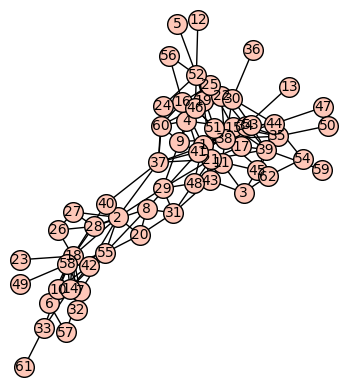

In [58]:
import networkx as nx
import math
G_m1 = nx.read_edgelist("out.dolphins", comments='%', create_using=nx.Graph(), nodetype=int) #če mamo podan seznam povezav drgač read_adjlist
G_m_sage1 = Graph(G_m1)
G_m_sage1.plot().show()

set([6]) [10, 57, 58, 14]


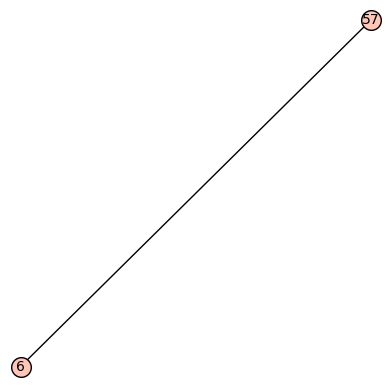

set([57, 6]) [7, 10, 58, 14]


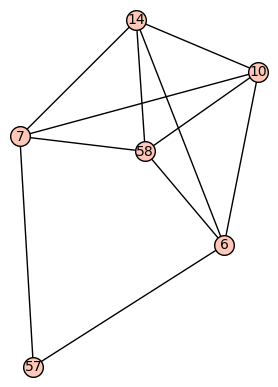

set([6, 7, 10, 14, 57, 58]) [18, 55, 33, 18, 42, 33, 18, 55, 42, 49, 18, 40, 55, 42]


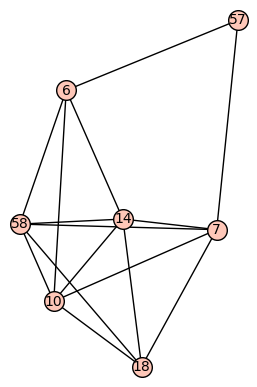

set([6, 7, 10, 14, 18, 57, 58]) [55, 33, 42, 33, 55, 42, 32, 2, 23, 26, 28, 49, 40, 55, 42]


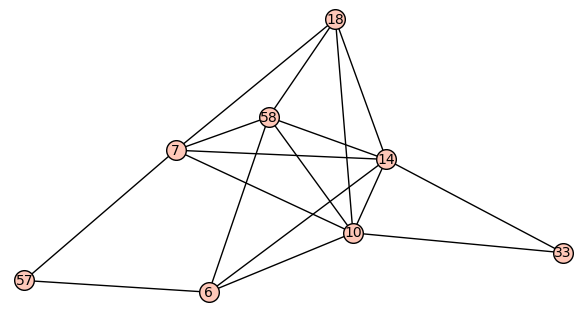

set([33, 6, 7, 10, 14, 18, 57, 58]) [61, 55, 42, 55, 42, 32, 2, 23, 26, 28, 49, 40, 55, 42]


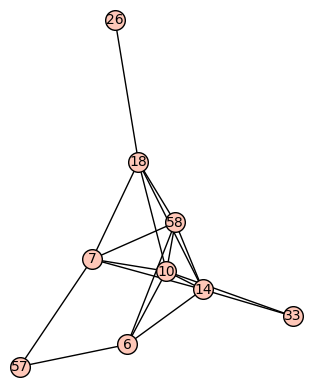

set([33, 6, 7, 10, 14, 18, 57, 26, 58]) [61, 55, 42, 55, 42, 32, 2, 23, 28, 27, 28, 49, 40, 55, 42]


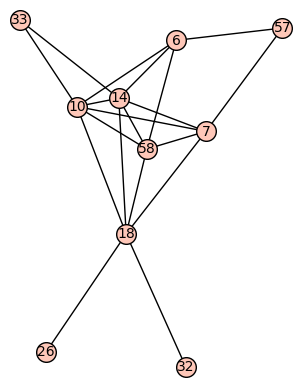

set([32, 33, 6, 7, 10, 14, 18, 57, 26, 58]) [61, 55, 42, 55, 42, 2, 23, 28, 27, 28, 49, 40, 55, 42]


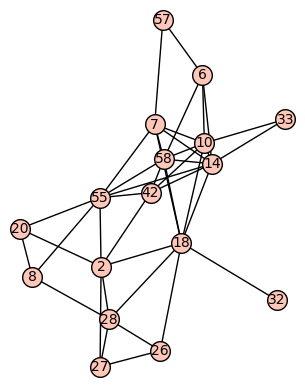

set([32, 33, 2, 6, 7, 8, 10, 14, 18, 58, 20, 55, 57, 26, 27, 28, 42]) [61, 37, 29, 41, 31, 23, 49, 40, 31]


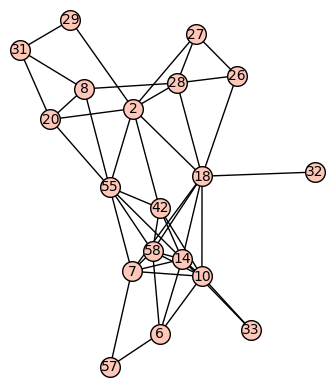

set([32, 33, 2, 6, 7, 8, 10, 58, 14, 18, 42, 20, 55, 57, 26, 27, 28, 29, 31]) [61, 37, 41, 49, 40, 23, 48, 21, 9, 48, 43]


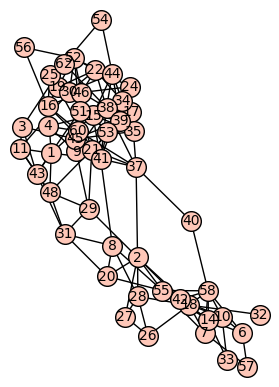

set([1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62]) [23, 36, 61, 13, 50, 59, 47, 5, 12, 49]


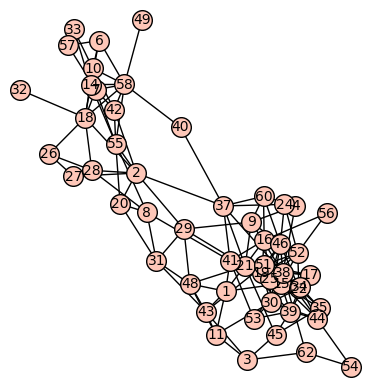

set([1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62]) [23, 36, 61, 13, 50, 59, 47, 5, 12]


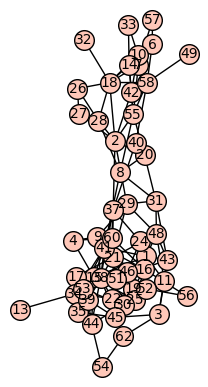

set([1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62]) [23, 36, 61, 50, 59, 47, 5, 12]


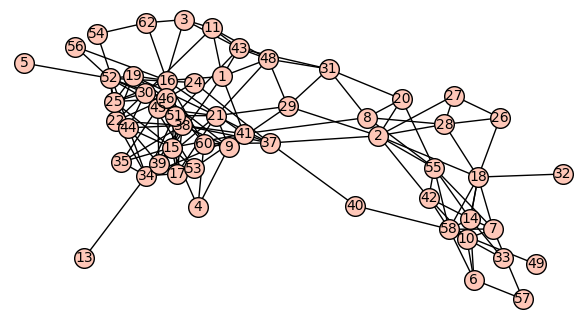

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62]) [23, 36, 61, 50, 59, 47, 12]


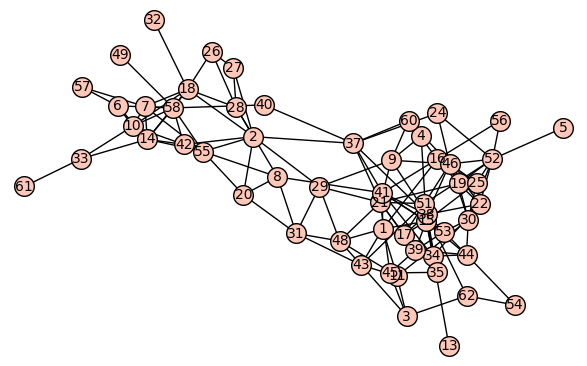

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62]) [23, 36, 50, 59, 47, 12]


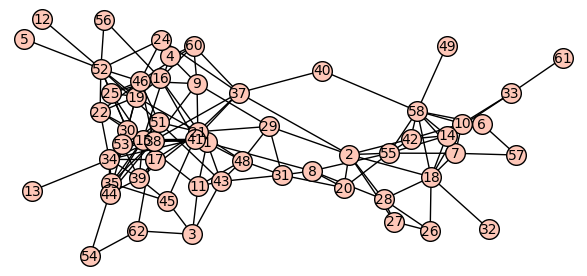

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62]) [23, 36, 50, 59, 47]


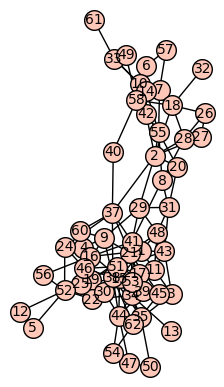

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62]) [23, 36, 59]


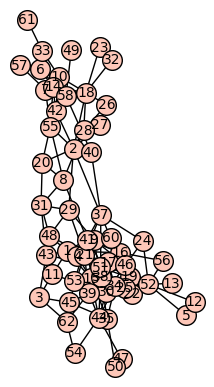

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62]) [36, 59]


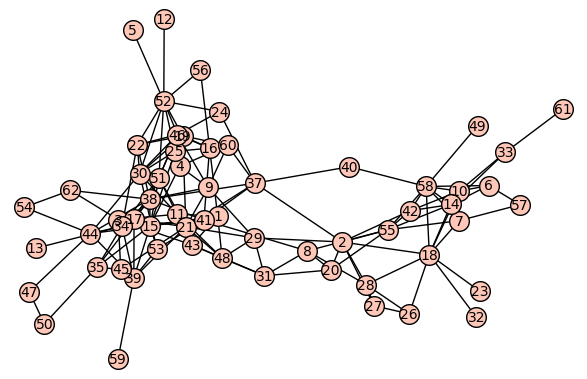

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]) [36]


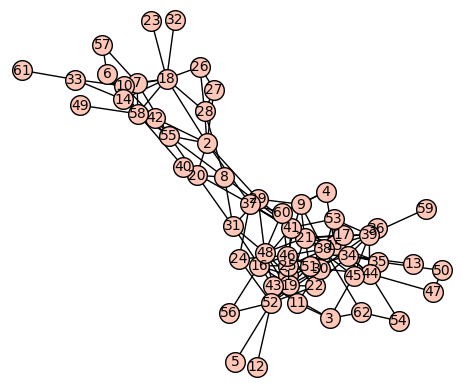

In [59]:
convextion_of_convex_subsets(G_m_sage1)
a = convextion_of_convex_subsets_brez_izpisovanja(G_m_sage1)

Konveksna ovojnica se po nekaj korakih precej poveča, potem pa se zadnjih nekaj korakov spet povečuje počasneje.
Naša hipoteza je da se bo pri večjem koeficientu ta skok še pospešil, pri manjšem pa da bomo porabili veliko več korakov. Pogledali si bomo torej primere mrež z koeficienti, ki so večji in manjši od tega. Glede na to, da se mreže razlikujejo po velikosti lahko opazujemo kako hitro se povečujejo konveksni podgrafi. Pomaga nam funkcija analiza, ki vrne povprečno število korakov algoritma, maksimalen skok in povprečen clustering coefficient.

In [20]:
analiza(a)

[16, 37, 0.259]

Če primerjamo povprečno število korakov, ki jih je algoritem porabil, da smo preko konveksnih podgrafov z dodajanjem vozlišč prišli do celotnega grafa, s številom vozlišč v originalnem grafu, opazimo da je število korakov približno štirikrat manjše od velikosti celotnega grafa, največji skok pa je bil za približno polovico vozlišč.
Poglejmo si zdaj mrežo s precej večjim koeficientom.

In [4]:
import networkx as nx
import math
G_m2 = nx.read_edgelist("out.arenas-jazz", comments='%', create_using=nx.Graph(), nodetype=int)
G_m_sage2 = Graph(G_m2)

In [12]:
convextion_of_convex_subsets_brez_izpisovanja(G_m_sage2)

[Subgraph of (): Graph on 2 vertices,
 Subgraph of (): Graph on 5 vertices,
 Subgraph of (): Graph on 174 vertices,
 Subgraph of (): Graph on 176 vertices,
 Subgraph of (): Graph on 177 vertices,
 Subgraph of (): Graph on 178 vertices,
 Subgraph of (): Graph on 179 vertices,
 Subgraph of (): Graph on 180 vertices,
 Subgraph of (): Graph on 181 vertices,
 Subgraph of (): Graph on 182 vertices,
 Subgraph of (): Graph on 183 vertices,
 Subgraph of (): Graph on 188 vertices,
 Subgraph of (): Graph on 189 vertices,
 Subgraph of (): Graph on 190 vertices,
 Subgraph of (): Graph on 191 vertices,
 Subgraph of (): Graph on 192 vertices,
 Subgraph of (): Graph on 193 vertices,
 Subgraph of (): Graph on 194 vertices,
 Subgraph of (): Graph on 195 vertices,
 Subgraph of (): Graph on 196 vertices,
 Subgraph of (): Graph on 197 vertices,
 Subgraph of (): Graph on 198 vertices]

Opazimo lahko da je se konveksna ovojnica močno povečala že po dveh dodanih vozliščih in ta kmalu vsebuje že večino vozlišč prvotnega grafa.

In [15]:
b = convextion_of_convex_subsets_brez_izpisovanja(G_m_sage2)
analiza(b)

[22, 171, 0.617]

Graf ima 198 vozlišč, algoritem pa je v povprečju potreboval 22 korakov. Razmerje med tema dvema količinama je 22/198, kar je približno 0,11 in je precej manjše kot pri prejšnjem primeru, zaradi razlike v koeficientu. To število bo torej večje pri počasnejši rasti podgrafov. Razmerje največjega skoka v številu vozlišč in številu vseh vozlišč pa je 171/198 = 0.8636, kar je tudi precej več kot v prejšnjem primeru (približno 0,5).
Poglejmo si še mreže z izrazito manjšim koeficientom.

Ogledamo si primer grafa z še nižjim koeficientom; približno 0,1. Mreža ima preobsežne podatke, zato podatke, ki nam jih je vrnil algoritem shranimo v ločeno datoteko grafi3.json.

In [7]:
import networkx as nx
import math
G_m3 = nx.read_edgelist("out.opsahl-powergrid", comments='%', create_using=nx.Graph(), nodetype=int)
G_m_sage3 = Graph(G_m3)

In [10]:
grafi3 = convextion_of_convex_subsets_brez_izpisovanja(G_m_sage3)
print(len(grafi3))
with open("grafi3.json", "w") as f:
    json.dump([G.vertices() for G in grafi3], f)

In [7]:
with open("grafi3.json") as f:
    grafi3_vozlisca = json.load(f)

Primer enega izmed podgrafov originalnega grafa po nekaj korakih algoritma.

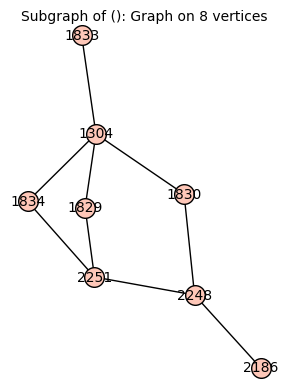

In [8]:
G_m_sage3.subgraph(grafi3_vozlisca[4])

In [10]:
 G_m_sage3.clustering_average()  #0.08010361108159714

5758588718/71889252435

Do celotnega grafa pri postopnem ustvarjanju konveksnih podgrafov pridemo po 2571 korakih. Celoten graf ima 4941 vozlišč, tako je razmerje med številom korakov v tem poskusu in velikostjo grafa 2571/4941, kar je približno 0.52 in je res več od prejšnjih dveh primerov.

Ponovimo enako še na primeru mreže s koeficientom blizu 0. Tudi ta graf ima obsežne podatke, zato vrnjene podatke izpišemo v ločeno datoteko, grafi4.

In [5]:
import networkx as nx
import math
G_m4 = nx.read_edgelist("out.ego-facebook", comments='%', create_using=nx.Graph(), nodetype=int)
G_m_sage4 = Graph(G_m4)

In [5]:
grafi4 = convextion_of_convex_subsets_brez_izpisovanja(G_m_sage4)
print(len(grafi4))
with open("grafi4.json", "w") as f:
    json.dump([G.vertices() for G in grafi4], f)


In [0]:
with open("grafi4.json") as f:
    grafi4 = [G_m_sage4.subgraph(V) for V in json.load(f)]

In [6]:
G_m_sage4.clustering_average()  #0.027247421431211827

5904642974932255975/216704651845275449856

Mreža ima 2888 vozlišč, algoritem pa potrebuje približno 2876 korakov. Tako je razmerje med količinami 2876/2888, kar je blizu 1 in večje od vseh prejšnih primerov.

Zaključimo lahko torej, da bodo pri mreži z majhnim koeficientom naši podgrafi zrastli veliko počasneje, kot pri mrežah z velikimi koeficienti. To se zgodi zato, ker za sestavo konveksne ovojnice v mrežah z majhnimi cikli rabimo dodati veliko več drugih vozlišč.

### Uporaba algoritma pri generiranih naključnih grafih.

Poglejmo si še delovanje algoritma na generiranih naključnih grafih.
Zgenerirali bomo 5 različnih tipov grafov, vsi grafi bodo na 100 vozliščih in to bomo ponovili 100-krat. Tipe grafov smo izbrali s smiselnimi paremetri, da se od tipa do tipa clustering coefficient razlikuje. Za vsak tip sva izračunala povprečno število korakov, povprečni največji skok in povprečni clustering coefficient, hkrati pa sva podala še en primer razvoja vsakega tipa grafa.

set([4]) [0, 1, 3]


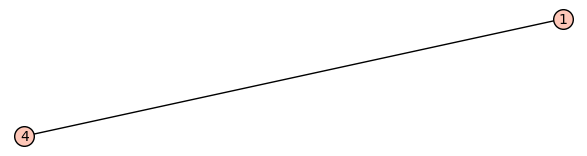

set([1, 4]) [0, 3]


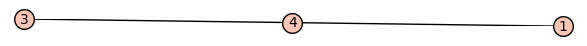

set([1, 3, 4]) [2, 0]


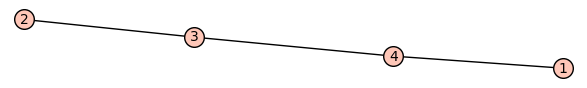

set([1, 2, 3, 4]) [0]


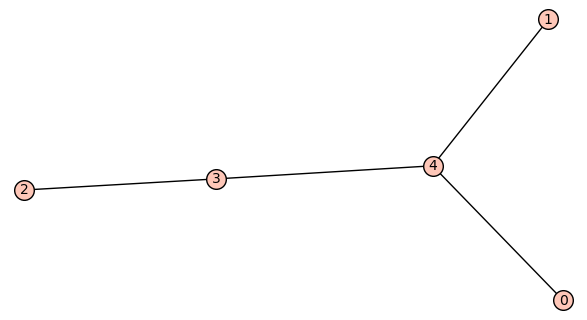

[Subgraph of (): Graph on 2 vertices,
 Subgraph of (): Graph on 3 vertices,
 Subgraph of (): Graph on 4 vertices,
 Subgraph of (): Graph on 5 vertices]

In [19]:
b = graphs.RandomTree(5)
b.plot()
convextion_of_convex_subsets(b)

In [16]:
def generiranje_skoraj_dreves(stevilo_dreves,stevilo_vozlisc):
    skoraj_drevesa=[]
    for i in range(1,stevilo_dreves+1):
        drevo = graphs.RandomTree(stevilo_vozlisc)
        n=0
        while n < drevo.order():
            if len(drevo.neighbors(n)) > 1:
                drevo.add_edge(drevo.neighbors(n)[0],drevo.neighbors(n)[1])
                n = drevo.order() + 1
            else:
                n +=1
        skoraj_drevesa.append(drevo)
    return skoraj_drevesa

In [17]:
seznamdreves=generiranje_skoraj_dreves(100,100)
povprecnostevilokorakov=0
povprecnimaxskok=0
koeficient=0
velikseznam=[]
for i in seznamdreves:
    grafki=convextion_of_convex_subsets_brez_izpisovanja(i)
    velikseznam.append(analiza(grafki))
for j in velikseznam:
    povprecnostevilokorakov += j[0]
    povprecnimaxskok += j[1]
    koeficient += j[2]
[round(povprecnostevilokorakov/100,4),round(povprecnimaxskok/100,4),round(koeficient/100,4)]

[99.0, 1.0, 0.0155]

**PRIMER 1:**

set([95]) [17, 81, 18, 99, 21, 23, 89, 11, 44, 92, 30, 62, 94, 79]


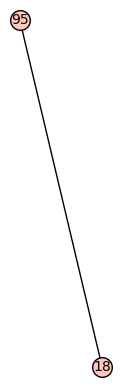

set([18, 95]) [16, 80, 33, 51, 42, 94, 17, 81, 99, 21, 23, 89, 11, 44, 92, 30, 62, 94, 79]


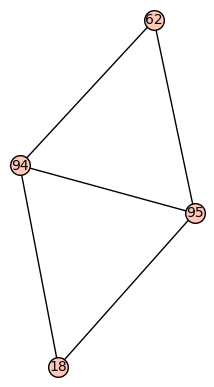

set([18, 94, 62, 95]) [16, 80, 33, 51, 42, 56, 11, 61, 81, 3, 99, 84, 53, 85, 55, 87, 41, 57, 76, 13, 17, 81, 99, 21, 23, 89, 11, 44, 92, 30, 79]


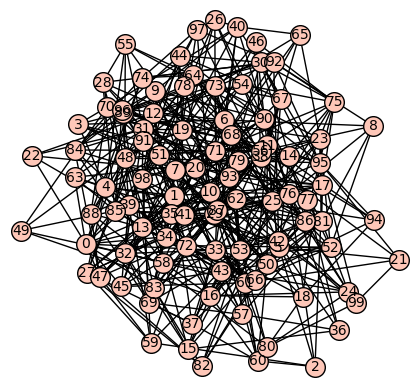

[Subgraph of (RandomGNP(100,0.100000000000000)): Graph on 2 vertices,
 Subgraph of (RandomGNP(100,0.100000000000000)): Graph on 4 vertices,
 Subgraph of (RandomGNP(100,0.100000000000000)): Graph on 100 vertices]

In [18]:
convextion_of_convex_subsets(graphs.RandomGNP(100,0.1))

**1.**

In [25]:
velikseznam=[]
povprecnostevilokorakov=0
povprecnimaxskok=0
koeficient=0
for i in range(0,100):
    grafki=convextion_of_convex_subsets_brez_izpisovanja(graphs.RandomGNP(100,0.1))
    velikseznam.append(analiza(grafki))
for j in velikseznam:
    povprecnostevilokorakov += j[0]
    povprecnimaxskok += j[1]
    koeficient += j[2]
[round(povprecnostevilokorakov/100,4),round(povprecnimaxskok/100,4),round(koeficient/100,4)]

[2.76, 96.97, 0.1]

**PRIMER 1:**

set([6]) [39, 8, 41, 75, 44, 77, 14, 46]


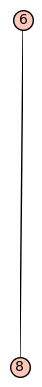

set([8, 6]) [33, 66, 98, 54, 70, 86, 28, 77, 14, 39, 41, 75, 44, 77, 14, 46]


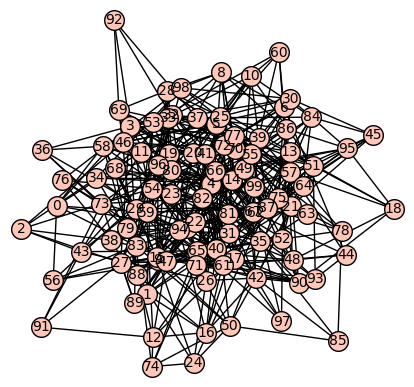

[Subgraph of (RandomGNP(100,0.100000000000000)): Graph on 2 vertices,
 Subgraph of (RandomGNP(100,0.100000000000000)): Graph on 100 vertices]

In [26]:
convextion_of_convex_subsets(graphs.RandomGNP(100,0.1))

**2.**

In [27]:
velikseznam=[]
povprecnostevilokorakov=0
povprecnimaxskok=0
koeficient=0
for i in range(0,100):
    grafki=convextion_of_convex_subsets_brez_izpisovanja(graphs.RandomRegular(12,100))
    velikseznam.append(analiza(grafki))
for j in velikseznam:
    povprecnostevilokorakov += j[0]
    povprecnimaxskok += j[1]
    koeficient += j[2]
[round(povprecnostevilokorakov/100,4),round(povprecnimaxskok/100,4),round(koeficient/100,4)]

[2.65, 97.0, 0.1031]

**PRIMER 2**

set([41]) [98, 51, 52, 70, 54, 9, 57, 26, 93, 46, 62, 79]


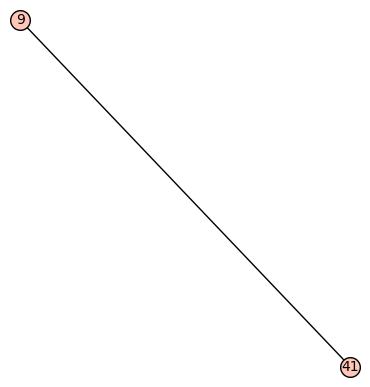

set([9, 41]) [64, 65, 97, 98, 86, 55, 72, 25, 74, 15, 95, 98, 51, 52, 70, 54, 57, 26, 93, 46, 62, 79]


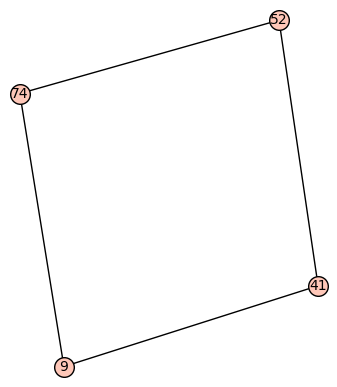

set([9, 74, 52, 41]) [64, 65, 97, 98, 86, 55, 72, 25, 15, 95, 80, 66, 86, 7, 71, 8, 11, 27, 29, 47, 67, 20, 85, 6, 8, 40, 88, 12, 94, 62, 98, 51, 70, 54, 57, 26, 93, 46, 62, 79]


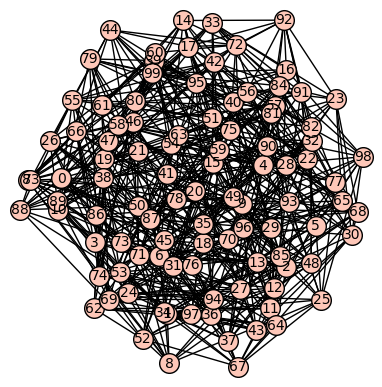

[Subgraph of (): Graph on 2 vertices,
 Subgraph of (): Graph on 4 vertices,
 Subgraph of (): Graph on 100 vertices]

In [28]:
convextion_of_convex_subsets(graphs.RandomRegular(12,100))

**3.**

In [7]:

velikseznam=[]
povprecnostevilokorakov=0
povprecnimaxskok=0
koeficient=0
for i in range(0,100):
    grafki=convextion_of_convex_subsets_brez_izpisovanja(graphs.RandomHolmeKim(100, 3, 0.5))
    velikseznam.append(analiza(grafki))
for j in velikseznam:
    povprecnostevilokorakov += j[0]
    povprecnimaxskok += j[1]
    koeficient += j[2]
[round(povprecnostevilokorakov/100,4),round(povprecnimaxskok/100,4),round(koeficient/100,4)]

[9.31, 88.03, 0.3625]

**PRIMER 3**

In [9]:
convextion_of_convex_subsets_brez_izpisovanja(graphs.RandomHolmeKim(100, 3, 0.5))

[Subgraph of (): Graph on 2 vertices,
 Subgraph of (): Graph on 3 vertices,
 Subgraph of (): Graph on 8 vertices,
 Subgraph of (): Graph on 93 vertices,
 Subgraph of (): Graph on 94 vertices,
 Subgraph of (): Graph on 97 vertices,
 Subgraph of (): Graph on 98 vertices,
 Subgraph of (): Graph on 99 vertices,
 Subgraph of (): Graph on 100 vertices]

**4.**

In [37]:
velikseznam=[]
povprecnostevilokorakov=0
povprecnimaxskok=0
koeficient=0
for i in range(0,100):
    grafki=convextion_of_convex_subsets_brez_izpisovanja(graphs.RandomBarabasiAlbert(100,20))
    velikseznam.append(analiza(grafki))
for j in velikseznam:
    povprecnostevilokorakov += j[0]
    povprecnimaxskok += j[1]
    koeficient += j[2]
[round(povprecnostevilokorakov/100,4),round(povprecnimaxskok/100,4),round(koeficient/100,4)]

[2.39, 97.61, 0.4266]

**PRIMER 4**

set([59]) [81, 2, 34, 82, 98, 51, 4, 20, 36, 37, 69, 22, 7, 23, 71, 55, 40, 72, 25, 89, 26, 27, 91, 13, 14, 30, 15, 47, 79]


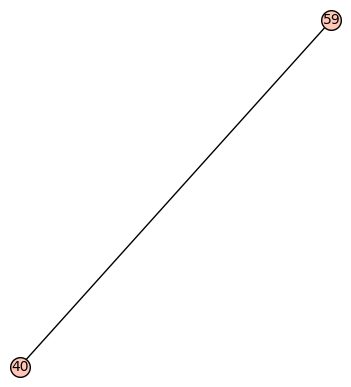

set([40, 59]) [32, 80, 96, 33, 81, 34, 50, 66, 35, 67, 99, 20, 36, 52, 68, 5, 21, 37, 53, 70, 7, 23, 39, 71, 24, 72, 9, 89, 25, 41, 57, 73, 26, 42, 74, 43, 28, 44, 60, 92, 13, 93, 29, 45, 46, 31, 63, 95, 81, 2, 34, 82, 98, 51, 4, 20, 36, 37, 69, 22, 7, 23, 71, 55, 72, 25, 89, 26, 27, 91, 13, 14, 30, 15, 47, 79]


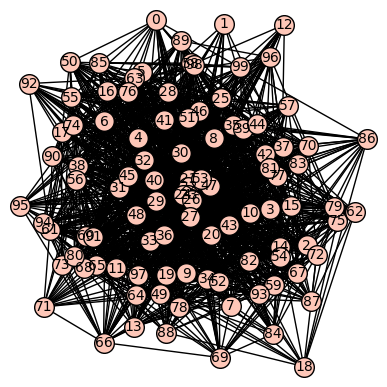

[Subgraph of (): Graph on 2 vertices, Subgraph of (): Graph on 100 vertices]

In [49]:
convextion_of_convex_subsets(graphs.RandomBarabasiAlbert(100,20))

**5.**

In [45]:
velikseznam=[]
povprecnostevilokorakov=0
povprecnimaxskok=0
koeficient=0
for i in range(0,100):
    grafki=convextion_of_convex_subsets_brez_izpisovanja(graphs.RandomNewmanWattsStrogatz(100,4,0.4))
    velikseznam.append(analiza(grafki))
for j in velikseznam:
    povprecnostevilokorakov += j[0]
    povprecnimaxskok += j[1]
    koeficient += j[2]
[round(povprecnostevilokorakov/100,4),round(povprecnimaxskok/100,4),round(koeficient/100,4)]

[4.67, 93.44, 0.2903]

**PRIMER 5**

set([94]) [96, 20, 92, 93, 46, 95]


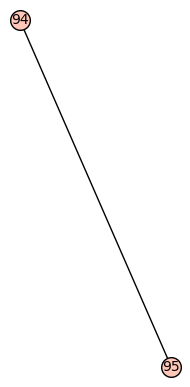

set([94, 95]) [96, 20, 92, 93, 46, 96, 97, 67, 93]


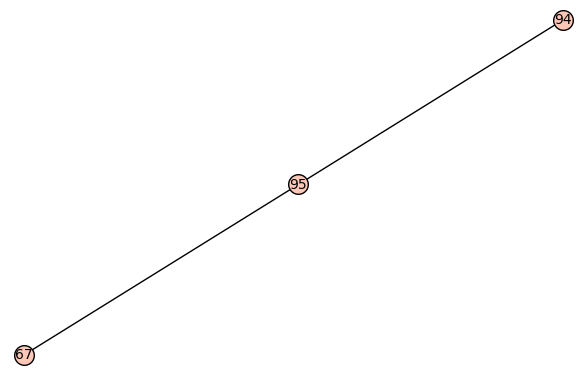

set([67, 94, 95]) [65, 66, 36, 68, 69, 44, 96, 20, 92, 93, 46, 96, 97, 93]


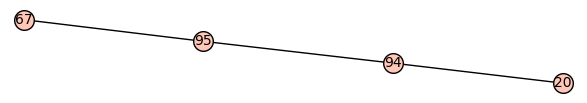

set([67, 20, 94, 95]) [65, 66, 36, 68, 69, 44, 18, 19, 21, 22, 55, 96, 92, 93, 46, 96, 97, 93]


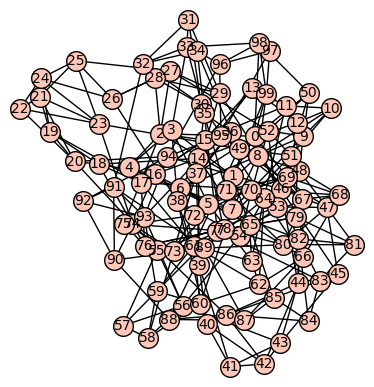

[Subgraph of (): Graph on 2 vertices,
 Subgraph of (): Graph on 3 vertices,
 Subgraph of (): Graph on 4 vertices,
 Subgraph of (): Graph on 100 vertices]

In [46]:
convextion_of_convex_subsets(graphs.RandomNewmanWattsStrogatz(100,4,0.4))